# [HW2] Heap Sort

## 流程圖(打完 code 才畫的)
![](https://i.imgur.com/A2suVjh.png)
## 學習歷程
- 參考網站
    - [hackerearth](https://www.hackerearth.com/zh/practice/algorithms/sorting/heap-sort/tutorial/) >>> 主要看流程圖，但不太明白它的array 為何要空一個 index[0]。
    - [geeksforgeeks](https://www.geeksforgeeks.org/heap-sort/) >>> 簡單說明，有影片，有範例程式碼(但是我先自己試試看)
---
##  Try

在看完 Heap Sort 的影片和一些 Heap Sort 的基本架構後，我想要先試著寫寫看，於是我造著在 geeksforgeeks 裡面提到三個步驟:

* **step 1** : 將 input 的 array 依造 heap 讀資料結構處理成 max heap 的形式。

* **step 2** : 這時候 root 值為 Max。root 與最後一個作交換 ，然後把 heap 的大小-1(以 array 的角度，就是將限制 haep 的index往左移，將以排序值排除在 heap 外。

* **step 3** : 重複上面的步驟直到 heap 只剩一個 element 。

### >>首先我要將 heap 中 父節點 & 左右子節點 的關係作出來

假設index 從0開始，父節點在 index=a 的位置則，Heap 與 array 的 index 有以下關係:

- `左子節點 = 2a + 1`
- `右子節點 = 2a + 2`

所以，我先弄一個可以拿到子節點index:
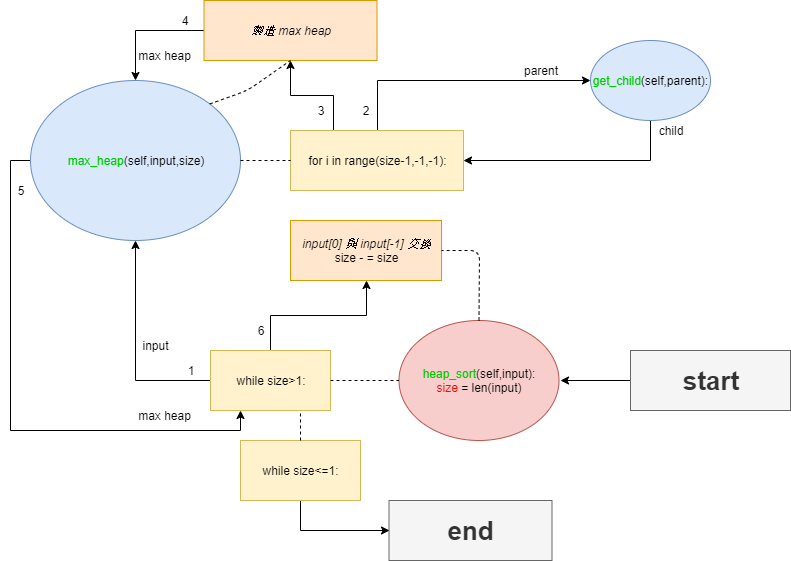

In [8]:
def get_child(parent):
        return {'left':2*parent+1,'right':2*parent+2}

In [8]:
# 測試一下
print('0 的左子樹: {}'.format(get_child(0)['left']))
print('0 的右子樹: {}'.format(get_child(0)['right']))

0 的左子樹: 1
0 的右子樹: 2


### >>接著我要將 input 的 array，轉換成 max heap 的形式
透過一個迴圈遍歷input，確保每個父節點皆大於他的子節點，假如他有子節點的話。

In [9]:
def max_heap(input_):
    left = 0 #預設 left
    right = 0 #預設 right   
    for i in range(len(input_)):
        child = get_child(i)
        left = child['left']
        right = child['right']
        if (len(input_) > left)&(len(input_)>right): # left & right 兩者的 index 沒超出 array
            #print(i)
            if (input_[i]>input_[left]) & (input_[i]>input_[right]): # 當負節點最大時，直接跳過
                continue
            elif (input_[right]<input_[left])&(input_[left]>input_[i]): #當左節點最大，將其與父節點交換。
                input_[i],input_[left] = input_[left],input_[i]
            else:
                input_[i],input_[right] = input_[left],input_[right]
                        

In [10]:
a=[1,5,3,7,2]
max_heap(a)
a

[5, 7, 3, 1, 2]

跟原本想的不太一樣...

## Try again

之後我發現，我這樣的做法在同一層可行，但是如果跨兩層就有問題了。因為有可能極大值在 heap 的偏下面沒辦法一次就換到 root，必須重最下面開始確保父節點已經大於子節點`於是我換成從最後一層開始排，也就是倒著遍歷。`

In [15]:
def max_heap(input_,size):
    for i in range(size-1,-1,-1):
        child = get_child(i)
        left = child['left']
        right = child['right']
        #print(i,left,right) 檢查用
        
        if (size<=left): # left 的 index 超出 array
            continue
        elif (size<right): # right 的 index 超出 array，但是left 沒有
            if input_[left]>input_[i]:
                input_[i],input_[left] = input_[left],input_[i]
        else:
            if (input_[i]>input_[left]) & (input_[i]>input_[right]): # 當負節點最大時，直接跳過
                continue
            elif (input_[right]<input_[left])&(input_[left]>input_[i]): #當左節點最大，將其與父節點交換。
                input_[i],input_[left] = input_[left],input_[i]
            else:  
                input_[i],input_[right] = input_[right],input_[i]                          

In [16]:
a=[1,5,3,7,2]
max_heap(a,len(a))
a

[7, 1, 3, 5, 2]

In [17]:
a=[2,1,3,5]
max_heap(a,len(a))
a

IndexError: list index out of range

## Try again and again

第一次對了，可是試第二個較短的 array 居然錯了!!!

後來我發現是在 `elif 那邊條件少一個 =` ，導致 heap 的最尾端只有左子節點的話會 miss 掉跑到else 去。

In [9]:
def max_heap(input_,size):
    for i in range(size-1,-1,-1):
        child = get_child(i)
        left = child['left']
        right = child['right']
        #print(i,left,right) 檢查用
        
        if (size<=left): # left 的 index 超出 array
            continue
        elif (size<=right): # right 的 index 超出 array，但是left 沒有
            if input_[left]>input_[i]:
                input_[i],input_[left] = input_[left],input_[i]
        else:
            if (input_[i]>input_[left]) & (input_[i]>input_[right]): # 當負節點最大時，直接跳過
                continue
            elif (input_[right]<input_[left])&(input_[left]>input_[i]): #當左節點最大，將其與父節點交換。
                input_[i],input_[left] = input_[left],input_[i]
            else:  
                input_[i],input_[right] = input_[right],input_[i]  

In [10]:
a=[1,5,3,7,2]
max_heap(a,len(a))
a

[7, 1, 3, 5, 2]

In [11]:
a=[2,1,3,5]
max_heap(a,len(a))
a

[5, 2, 3, 1]

In [12]:
a=[1,2,3]
max_heap(a,len(a))
a

[3, 2, 1]

In [13]:
a=[1,2]
max_heap(a,len(a))
a

[2, 1]

終於成功了!!! 中間因為邏輯不太對，改了好幾次。怕後面還有bug 所以我多試幾次。

我覺得之後會需要限制 heap，`所以我將 len(input) 換成可變動的 size`，也就是呼叫heapsort 我可以把長度限制在 size下。

### >> 緊接著就是把已經為最大值的 root 掉到最後面，然後限制 heap 的大小(其實已排序的值還在array，只是限制了index)

In [14]:
def heap_sort(input_):
    size = len(input_)
    while size>1:
        max_heap(input_,size)
        input_[0],input_[size-1] = input_[size-1],input_[0]
        size-=1
    

In [15]:
input = [1,5,3,7,2]
heap_sort(input)
input

[1, 2, 3, 5, 7]

這邊比較容易，一次就達成了!!!

### >> 最後把所有零件都組起來~ 在寫成 class 的形式


In [1]:
class Solution(object):
    def get_child(self,parent):
            return {'left':2*parent+1,'right':2*parent+2}
    def max_heap(self,input_,size):
        for i in range(size-1,-1,-1):
            child = self.get_child(i)
            left = child['left']
            right = child['right']
            #print(i,left,right) 檢查用

            if (size<=left): # left 的 index 超出 array
                continue
            elif (size<=right): # right 的 index 超出 array，但是left 沒有
                if input_[left]>input_[i]:
                    input_[i],input_[left] = input_[left],input_[i]
            else:
                if (input_[i]>input_[left]) & (input_[i]>input_[right]): # 當負節點最大時，直接跳過
                    continue
                elif (input_[right]<input_[left])&(input_[left]>input_[i]): #當左節點最大，將其與父節點交換。
                    input_[i],input_[left] = input_[left],input_[i]
                else:  
                    input_[i],input_[right] = input_[right],input_[i]  
    def heap_sort(self,input_):
        size = len(input_)
        while size>1:
            self.max_heap(input_,size)
            input_[0],input_[size-1] = input_[size-1],input_[0]
            size-=1
        return input_

# Test

In [16]:
import random

for _ in range(10):
    l = random.randint(2,30)
    array = [random.randint(-50,100) for _ in range(l)]
    print('input:',array)
    out=Solution().heap_sort(array)
    print('sorted:',out,'\n')
        
    

input: [48, 37, -23, 16, -39, 12, 28, 48, 45, 3, 66, 40, 76, -8, 58, 12, 75, 91, 46, 38, -41, 95, 74, 28, 54]
sorted: [-41, -39, -23, -8, 3, 12, 12, 16, 28, 28, 37, 38, 40, 46, 48, 48, 45, 54, 58, 66, 74, 75, 76, 91, 95] 

input: [-50, 75, 100]
sorted: [-50, 75, 100] 

input: [23, 64, 66, 50, 87, -22, 7, 77, -28, 85, -48, 60, 47, 8, 78, 4, 94, 65, -17, 57, 49, 42, 6, 50, -29, -47]
sorted: [-48, -47, -29, -28, -22, -17, 4, 6, 7, 8, 23, 42, 47, 49, 50, 50, 57, 60, 64, 65, 66, 77, 78, 85, 87, 94] 

input: [24, -44, -27, -1]
sorted: [-44, -27, -1, 24] 

input: [85, -49, 15, -4, 40, -50, 5]
sorted: [-50, -49, -4, 5, 15, 40, 85] 

input: [-20, 56, -44, -7, 68, 85, 84, 68, 76, 26, 76, -31, 9, 87, 58, -45, 92, 83, 41, 24, 96]
sorted: [-45, -44, -31, -20, -7, 9, 24, 26, 41, 56, 58, 68, 68, 76, 76, 83, 84, 85, 87, 92, 96] 

input: [-9, 53, -47, -29, -20, -47, 44, 3, 21, 40, 86, 25, -28, 22, 84, -12, -2, -27, 93, 27, 90, -27, -42, 66, 68, -15, -5, 52, -2, 40]
sorted: [-47, -47, -42, -29, -28, -27

### >> 看起來很順利呢~